# 1. Load libaries

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras import regularizers, optimizers 
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline


# 2. Load data

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 6s 0us/step


In [4]:
print(x_train.shape)
print(type(x_train))

(50000, 32, 32, 3)
<class 'numpy.ndarray'>


# 3. Data Normalization - solution 2 for gradient vanishing

In [5]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# data normalization
mean = np.mean(x_train)
std  = np.std(x_train)

x_train = (x_train-mean)/std
x_test  = (x_test-mean)/std

In [6]:
# model - 12 layer - relu
model7 = keras.models.Sequential()
model7.add(tf.keras.Input(shape=(32, 32, 3)))

model7.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model7.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model7.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model7.add(keras.layers.MaxPooling2D(2))

model7.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model7.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model7.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model7.add(keras.layers.MaxPooling2D(2))

model7.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model7.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model7.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model7.add(keras.layers.MaxPooling2D(2))

model7.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model7.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model7.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model7.add(keras.layers.MaxPooling2D(2))

# flatten
model7.add(keras.layers.Flatten())
model7.add(keras.layers.Dense(512, activation='relu'))
model7.add(keras.layers.Dense(10, activation='softmax'))
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       147584    
                                                        

In [7]:
# optimizer and loss
# opt = tf.keras.optimizers.Adam(0.0001)
model7.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history5 = model7.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=256, 
                    epochs=100, verbose = 2)

Epoch 1/100
196/196 - 39s - loss: 1.8896 - sparse_categorical_accuracy: 0.2628 - val_loss: 1.5510 - val_sparse_categorical_accuracy: 0.3847 - 39s/epoch - 198ms/step
Epoch 2/100
196/196 - 19s - loss: 1.3949 - sparse_categorical_accuracy: 0.4628 - val_loss: 1.2634 - val_sparse_categorical_accuracy: 0.5344 - 19s/epoch - 97ms/step
Epoch 3/100
196/196 - 19s - loss: 1.0910 - sparse_categorical_accuracy: 0.6059 - val_loss: 1.0651 - val_sparse_categorical_accuracy: 0.6183 - 19s/epoch - 98ms/step
Epoch 4/100
196/196 - 20s - loss: 0.8881 - sparse_categorical_accuracy: 0.6836 - val_loss: 0.9079 - val_sparse_categorical_accuracy: 0.6744 - 20s/epoch - 100ms/step
Epoch 5/100
196/196 - 20s - loss: 0.7419 - sparse_categorical_accuracy: 0.7387 - val_loss: 0.7549 - val_sparse_categorical_accuracy: 0.7429 - 20s/epoch - 101ms/step
Epoch 6/100
196/196 - 21s - loss: 0.6276 - sparse_categorical_accuracy: 0.7800 - val_loss: 0.7071 - val_sparse_categorical_accuracy: 0.7577 - 21s/epoch - 109ms/step
Epoch 7/100


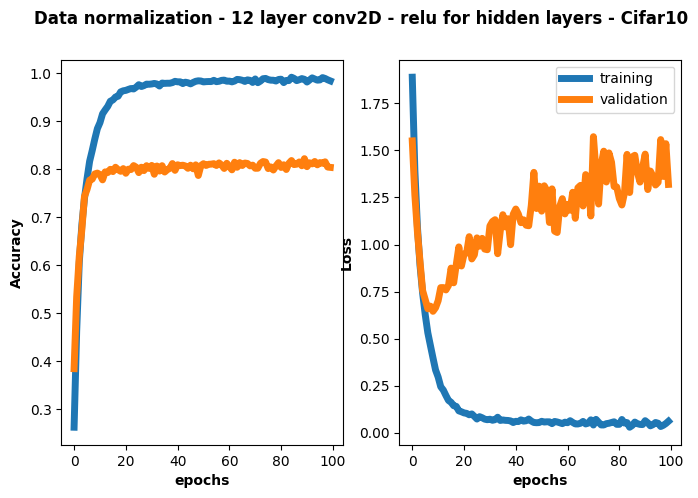

In [10]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (8,5))
axs[0].plot(range(len(history5.history['sparse_categorical_accuracy'])), history5.history['sparse_categorical_accuracy'], label='training', linewidth = 5)
axs[0].plot(range(len(history5.history['val_sparse_categorical_accuracy'])), history5.history['val_sparse_categorical_accuracy'], label='validation', linewidth = 5)
axs[1].plot(range(len(history5.history['loss'])), history5.history['loss'], label='training', linewidth = 5)
axs[1].plot(range(len(history5.history['val_loss'])), history5.history['val_loss'], label='validation', linewidth = 5)
axs[0].set_xlabel("epochs", fontweight = 'bold')
axs[1].set_xlabel("epochs", fontweight = 'bold')
axs[0].set_ylabel("Accuracy", fontweight = 'bold')
axs[1].set_ylabel("Loss", fontweight = 'bold')
plt.legend()
fig.suptitle("Data normalization - 12 layer conv2D - relu for hidden layers - Cifar10", fontweight = 'bold')
plt.show()